## Introduction

This document presents a comprehensive analysis of sales prediction based on advertising expenditures across TV, radio, and newspaper channels. The study employs statistical and machine learning techniques to understand the impact of advertising spend on sales and to build predictive models.

In [1]:
## Import Libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Key Features:

1. TV: Investment in TV advertising campaigns (in thousands of dollars).
2. Radio: Investment in radio advertising campaigns (in thousands of dollars).
3. Newspaper: Investment in newspaper advertising campaigns (in thousands of dollars).
4. Sales: Revenue generated from sales campaigns (in Millions of dollars).

In [2]:
## Read data

df= pd.read_csv('advertising.csv')

#### Convert the investments into millions of dollars
df['TV'] = df['TV'] / 1000
df['radio'] = df['radio'] / 1000
df['newspaper'] = df['newspaper'] / 1000

# Display the first few rows of the extended dataset
df.head()

,TV,radio,newspaper,sales
0,0.2301,0.0378,0.0692,22.1
1,0.0445,0.0393,0.0451,10.4
2,0.0172,0.0459,0.0693,9.3
3,0.1515,0.0413,0.0585,18.5
4,0.1808,0.0108,0.0584,12.9


In [3]:
# Counting duplicate rows
duplicate_rows = df[df.duplicated()]
print("no of duplicate_rows: ", len(duplicate_rows))

df.info()

no of duplicate_rows:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## EDA

In [4]:
# Summary statistics
summary_statistics = df.describe()
print(summary_statistics)

               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean     0.147043    0.023264    0.030554   14.022500
std      0.085854    0.014847    0.021779    5.217457
min      0.000700    0.000000    0.000300    1.600000
25%      0.074375    0.009975    0.012750   10.375000
50%      0.149750    0.022900    0.025750   12.900000
75%      0.218825    0.036525    0.045100   17.400000
max      0.296400    0.049600    0.114000   27.000000


#### TV Advertising Spend is the Highest Among the Channels:

1. The mean expenditure on TV advertising is significantly higher (147.04) compared to radio (23.26) and newspaper (30.55).
2. This suggests that the company invests more in TV advertising than in radio and newspaper advertising.

#### Sales Have Moderate Variation:

1. The standard deviation of sales is 5.22, indicating moderate variability in sales figures.
2. The range of sales goes from a minimum of 1.6 to a maximum of 27, showing a wide spread of sales performance across different observations.

#### Univariate Analysis

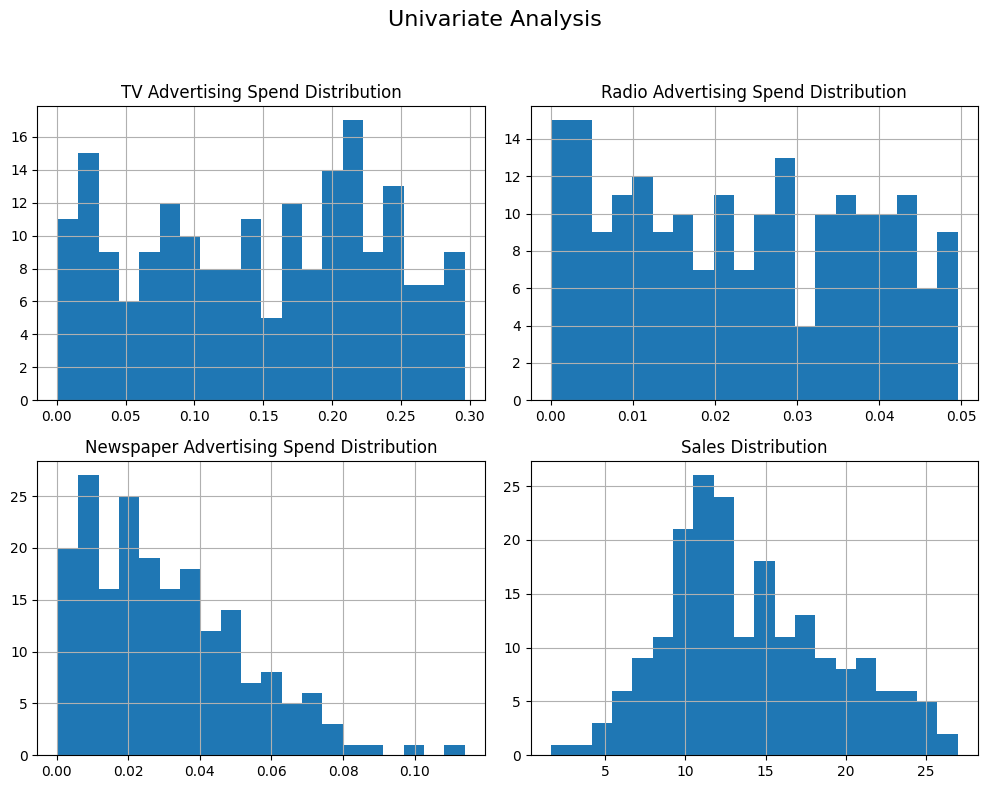

In [5]:

def univariate_analysis(df):
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    fig.suptitle('Univariate Analysis', fontsize=16)

    # Numerical variables
    df['TV'].hist(bins=20, ax=axes[0, 0])
    axes[0, 0].set_title('TV Advertising Spend Distribution')

    df['radio'].hist(bins=20, ax=axes[0, 1])
    axes[0, 1].set_title('Radio Advertising Spend Distribution')

    df['newspaper'].hist(bins=20, ax=axes[1, 0])
    axes[1, 0].set_title('Newspaper Advertising Spend Distribution')

    df['sales'].hist(bins=20, ax=axes[1, 1])
    axes[1, 1].set_title('Sales Distribution')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

#### Perform Univariate Analysis
univariate_analysis(df)

#### Advertising Spend Distribution:
1. TV advertising spend varies widely with no dominant range.
2. Radio advertising spend is more evenly distributed.
3. Newspaper advertising spend is mostly on the lower end.

#### Sales Distribution:
1. Sales are mostly around the middle values, indicating consistent performance.

#### Bivariate Analysis

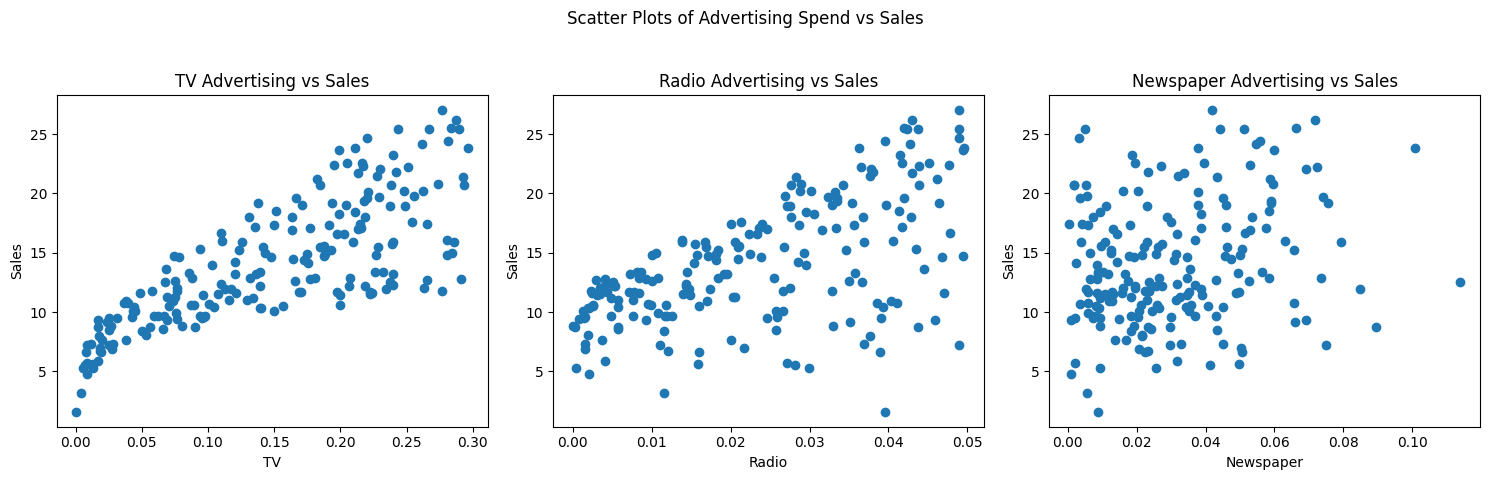

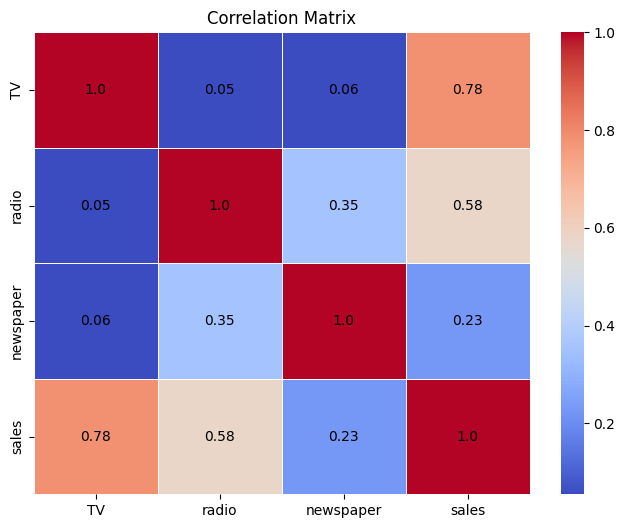

In [6]:
def bivariate_analysis(df):
    # Scatter plots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle('Scatter Plots of Advertising Spend vs Sales')

    # TV vs Sales
    axes[0].scatter(df['TV'], df['sales'])
    axes[0].set_title('TV Advertising vs Sales')
    axes[0].set_xlabel('TV')
    axes[0].set_ylabel('Sales')

    # Radio vs Sales
    axes[1].scatter(df['radio'], df['sales'])
    axes[1].set_title('Radio Advertising vs Sales')
    axes[1].set_xlabel('Radio')
    axes[1].set_ylabel('Sales')

    # Newspaper vs Sales
    axes[2].scatter(df['newspaper'], df['sales'])
    axes[2].set_title('Newspaper Advertising vs Sales')
    axes[2].set_xlabel('Newspaper')
    axes[2].set_ylabel('Sales')

    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # Calculate the correlation matrix
    correlation_matrix = df.corr()

    # Plot the heatmap of the correlation matrix
    plt.figure(figsize=(8, 6))
    heatmap = sns.heatmap(correlation_matrix, fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"size": 12})

    # Manually add the annotations if needed
    for i in range(correlation_matrix.shape[0]):
        for j in range(correlation_matrix.shape[1]):
            plt.text(j + 0.5, i + 0.5, round(correlation_matrix.iloc[i, j], 2),
                     horizontalalignment='center',
                     verticalalignment='center',
                     color='black')

    plt.title('Correlation Matrix')
    plt.show()


bivariate_analysis(df)

#### TV Advertising vs. Sales:
1. There is a clear positive relationship; as TV advertising spend increases, sales also increase.

#### Radio and Newspaper Advertising vs. Sales:
1. Radio advertising shows a moderate positive relationship with sales, while newspaper advertising has a weaker and less clear relationship with sales.

#### Correlation Matrix:
1. TV advertising has the strongest correlation with sales (0.78), followed by radio (0.58), and newspaper advertising has the weakest correlation with sales (0.23).

#### OLS Vs Linear Regression

1. OLS for Statistical Understanding: Use statsmodels' OLS for detailed statistical summaries and diagnostic analysis to gain a thorough understanding of the relationships between variables in your data.
2. Linear Regression for Modeling and Scalability: Use sklearn's LinearRegression for building scalable predictive models, applying cross-validation and regularization techniques to enhance model performance and generalizability. 

This combined approach leverages the strengths of both libraries for robust and efficient data analysis and modeling.

In [7]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Define features and target variable
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrame to retain column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Add a constant to the model (intercept) for OLS
X_train_scaled_const = sm.add_constant(X_train_scaled)

# Train the OLS model
OLS_model = sm.OLS(y_train, X_train_scaled_const).fit()

# Print the summary of the model with variable names
print(OLS_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     446.6
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           2.53e-76
Time:                        01:41:36   Log-Likelihood:                -306.64
No. Observations:                 160   AIC:                             621.3
Df Residuals:                     156   BIC:                             633.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.1000      0.132    107.075      0.0

## Commonly Used Metrics in Practice

#### R-squared and Adjusted R-squared:
1. R-squared: Indicates the proportion of variance in the dependent variable explained by the model. Higher values indicate a better fit.
2. Adjusted R-squared: Adjusted for the number of predictors in the model. Important for models with multiple predictors. (Focus more on this)

#### Coefficients (coef):
1. Indicates the expected change in the dependent variable for a one-unit change in the predictor variable, holding other variables constant. Provides insights into the relationship between predictors and the target variable.

#### P-values for Coefficients (P>|t|):
1. Tests the null hypothesis that the coefficient is equal to zero (no effect). Commonly used to determine the significance of each predictor. Predictors with p-values less than 0.05 are typically considered significant.
#### Key Points about P-values
1. P-value < 0.05:
    1. Meaning: Strong evidence that the predictor (e.g., TV advertising) has an effect on sales.
    2. Example: If the p-value for TV advertising is 0.002, it means TV advertising significantly increases sales. You can confidently say that TV advertising has an impact on sales.
    
2. P-value = 0.05:
    1. Meaning: The predictor is at the borderline of being considered significant.
    2. Example: If the p-value for radio advertising is 0.05, it means radio advertising is marginally significant. It might have an effect on sales, but the evidence is not very strong.

3. P-value > 0.05:
    1. Meaning: Weak evidence that the predictor has an effect on sales. You fail to reject the null hypothesis.
    2. Example: If the p-value for newspaper advertising is 0.35, it means newspaper advertising does not significantly affect sales. You can't confidently say that newspaper advertising impacts sales.

#### Standard Error (std err):
1. Indicates the average distance that the observed values fall from the regression line. Helps assess the precision of the coefficient estimates.

#### Confidence Intervals ([0.025, 0.975]):
1. Provides a range within which the true coefficient is expected to fall 95% of the time. Helps understand the reliability of the coefficient estimates.

#### F-statistic and Prob (F-statistic):
1. Tests the overall significance of the model. A low p-value indicates that the model explains a significant portion of the variance in the dependent variable, for better model (High F-statistic & Prob (F-statistic) < 0.05)

#### Example Interpretation Using Key Metrics
#### R-squared and Adjusted R-squared
1. R-squared: 0.896: Indicates that 89.6% of the variance in sales can be explained by the model.
2. Adjusted R-squared: 0.894: Similar to R-squared but adjusted for the number of predictors.

#### Coefficients and P-values
1. Intercept (const): 14.1000, p < 0.000
    1. Coefficient Interpretation: The expected sales when all predictors (TV, radio, newspaper advertising) are zero. This represents the baseline sales level.
    2. P-value Interpretation: The intercept is highly significant, indicating that the baseline sales level is statistically different from zero.


2. TV Advertising (x1): 3.7642, p < 0.000
    1. Coefficient Interpretation: For each one-unit increase in TV advertising spend, sales increase by approximately 3.7642 units, holding other factors constant.
    2. P-value Interpretation: TV advertising is highly significant. The low p-value (< 0.000) indicates strong evidence that TV advertising has a meaningful impact on sales.

3. Radio Advertising (x2): 2.7923, p < 0.000
    1. Coefficient Interpretation: For each one-unit increase in radio advertising spend, sales increase by approximately 2.7923 units, holding other factors constant.
    2. P-value Interpretation: Radio advertising is highly significant. The low p-value (< 0.000) indicates strong evidence that radio advertising has a meaningful impact on sales.

4. Newspaper Advertising (x3): 0.0560, p = 0.696
    1. Coefficient Interpretation: For each one-unit increase in newspaper advertising spend, sales increase by approximately 0.0560 units, holding other factors constant.
    2. P-value Interpretation: Newspaper advertising is not significant. The high p-value (0.696) suggests that there is weak evidence against the null hypothesis, indicating that newspaper advertising does not have a meaningful impact on sales.

#### Standard Errors and Confidence Intervals
1. Standard errors and confidence intervals help assess the precision and reliability of the coefficient estimates. For example, the confidence interval for x1 is [3.504, 4.025], indicating high reliability.

#### F-statistic and Prob (F-statistic)
1. F-statistic: 446.6, p < 0.000: Indicates that the model is statistically significant, meaning it explains a significant portion of the variance in sales.

#### Practical Use
#### When reporting or making decisions based on a linear regression model, it is common to focus on the following:

1. R-squared and Adjusted R-squared for model fit.
2. Coefficients to understand the effect size of each predictor.
3. P-values to determine the significance of each predictor.
4. Standard Errors and Confidence Intervals to assess the precision and reliability of the coefficients.
5. F-statistic to evaluate the overall model significance.

These metrics provide a comprehensive but focused understanding of the model's performance and the relationships between the predictors and the dependent variable.

In [8]:
#### Linear Regression

# Initialize the linear regression model
lr_model = LinearRegression()

# Train the model without adding a constant, just scaled features
lr_model.fit(X_train_scaled_df, y_train)

LinearRegression()

In [9]:
# Perform cross-validation
cv_scores = cross_val_score(lr_model, X_train_scaled_df, y_train, cv=10, scoring='r2')
print(f'Cross-Validation R2 Scores: {cv_scores}')
print(f'Average Cross-Validation R2 Score: {np.mean(cv_scores)}')

Cross-Validation R2 Scores: [-0.10975169  0.87992761  0.88460907  0.95616404  0.93017934  0.92369938
  0.86467693  0.95081368  0.7622523   0.87097792]
Average Cross-Validation R2 Score: 0.7913548596916337


In [10]:
# Make predictions on the test set
y_pred = lr_model.predict(X_test_scaled_df)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3.174097353976105
R-squared: 0.899438024100912


In [11]:
# Print the coefficients
coefficients = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

           Coefficient
TV            3.764196
radio         2.792307
newspaper     0.055976


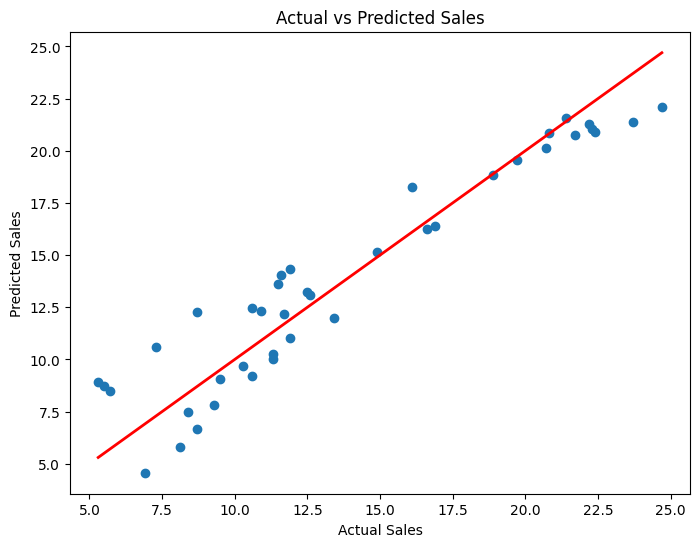

In [12]:
# Plot predictions vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

#### Elasticity
1. Elasticity measures the responsiveness of sales to changes in advertising spend.

#### Lift analysis: 
1. The lift analysis measures the increase in a metric (e.g., sales) due to a specific marketing activity compared to a baseline or control group. In this case, you're measuring the lift in sales for a hypothetical increase in TV advertising by 10 units. 

#### Units:
1. Lift Analysis: Typically expressed in monetary units (e.g., dollars).
2. Elasticity: Expressed as a percentage.

#### Use Cases:

1. Lift Analysis: Used for practical budgeting decisions and understanding the direct impact of specific changes.
2. Elasticity: Used for strategic planning and understanding the sensitivity of sales to spend changes across different channels.

#### Elasticity Calculation
1. Calculate Mean TV Advertising Spend and Mean Sales:
    1. mean_tv_ad_spend = X['TV'].mean()
    2. mean_sales = y.mean()

2. Elasticity Calculation:
    1. elasticity_tv = 3.7642 * (mean_tv_ad_spend / mean_sales)
    2. print(elasticity_tv)
    
    
#### Interpretation
1. Coefficient Interpretation: The coefficient 3.7642 tells us that for each additional unit increase in TV advertising spend, sales increase by approximately 3.7642 units.
2. Elasticity Interpretation: The calculated elasticity of 40.05 means that a 1% increase in TV advertising spend results in a 40.05% increase in sales.

#### Practical Example

1. If the current average TV advertising spend is 100,000 and the average sales are 1,000,000:

    1. 1% increase in TV advertising spend is 1,000.
    2. With an elasticity of 40.05, the sales increase would be 40.05% of 1,000,000, which is 400,500.

In [13]:
#### Calculate elasticity
elasticity = lr_model.coef_ * X_train.mean() / y_train.mean() * 100
elasticity = pd.DataFrame(elasticity, index=X.columns, columns=['Elasticity'])
print(elasticity)

           Elasticity
TV           4.004981
radio        0.453020
newspaper    0.011888


#### High Impact of TV Advertising:
1. Elasticity: 4.00
2. Interpretation: A 1% increase in TV advertising spend results in a 4.00% increase in sales. TV advertising is highly effective in driving sales. Companies should allocate a larger portion of their advertising budget to TV ads to maximize sales impact.

#### Moderate Impact of Radio Advertising:
1. Elasticity: 0.45
2. Interpretation: A 1% increase in radio advertising spend leads to a 0.45% increase in sales. While effective, radio advertising is less impactful than TV advertising and should be used complementarily to TV campaigns for optimal results.

#### Minimal Impact of Newspaper Advertising:
1. Elasticity: 0.01
2. Interpretation: A 1% increase in newspaper advertising spend results in only a 0.01% increase in sales, suggesting very low responsiveness. Funds for newspaper advertising may be better reallocated to more effective channels like TV and radio to achieve a higher return on investment.

In [14]:
#### lift_analysis

def lift_analysis(lr_model, scaler, baseline_values, increase_column, increase_amount):
    """
    Perform lift analysis and plot results.
    
    Parameters:
    lr_model: Trained linear regression model.
    scaler: StandardScaler object used to scale the features.
    baseline_values: List of baseline values for the features.
    increase_column: Column name to increase (e.g., 'TV').
    increase_amount: Amount to increase the specified column by.
    """
    # Create a baseline prediction with all features set to the baseline values
    baseline_sales = lr_model.predict(scaler.transform([baseline_values]))[0]
    
    # Copy baseline values and increase the specified column by the given amount
    new_values = baseline_values.copy()
    column_index = X.columns.get_loc(increase_column)
    new_values[column_index] += increase_amount
    
    # Predict new sales with the increased value
    new_sales = lr_model.predict(scaler.transform([new_values]))[0]
    
    # Calculate lift
    lift = new_sales - baseline_sales
    
    # Print the lift result
    print(f'Lift in Sales for a {increase_amount}-unit increase in {increase_column} Advertising: {lift}')
    
    # Plot baseline vs new sales
    plt.figure(figsize=(8, 6))
    bars = plt.bar(['Baseline Sales', f'New Sales with +{increase_amount} {increase_column}'], [baseline_sales, new_sales], color=['blue', 'green'])
    plt.ylabel('Sales')
    plt.title(f'Baseline Sales vs. New Sales with Increased {increase_column} Advertising')
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
    plt.show()

Lift in Sales for a 0.01-unit increase in TV Advertising: 0.44729517468716296


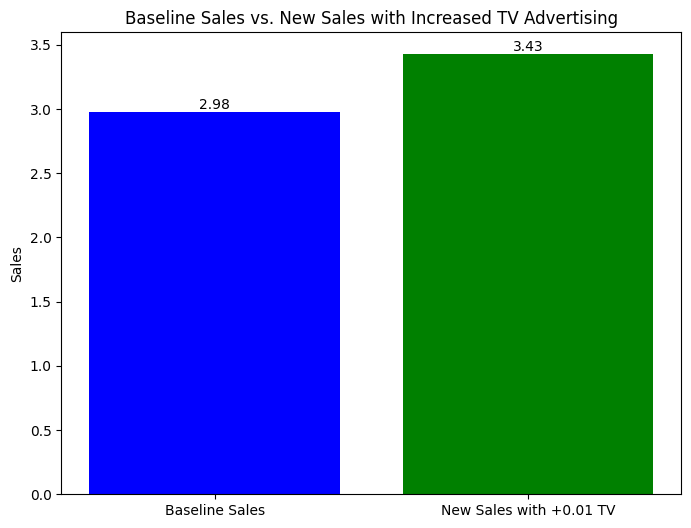

In [15]:
# Example usage
# Assuming the linear regression model (lr_model) and scaler have already been trained and defined
baseline_values = [0, 0, 0]  # Replace with actual baseline values if needed
increase_column = 'TV'
increase_amount = 0.01

lift_analysis(lr_model, scaler, baseline_values, increase_column, increase_amount)

Lift in Sales for a 10-unit increase in radio Advertising: 1891.9505423437656


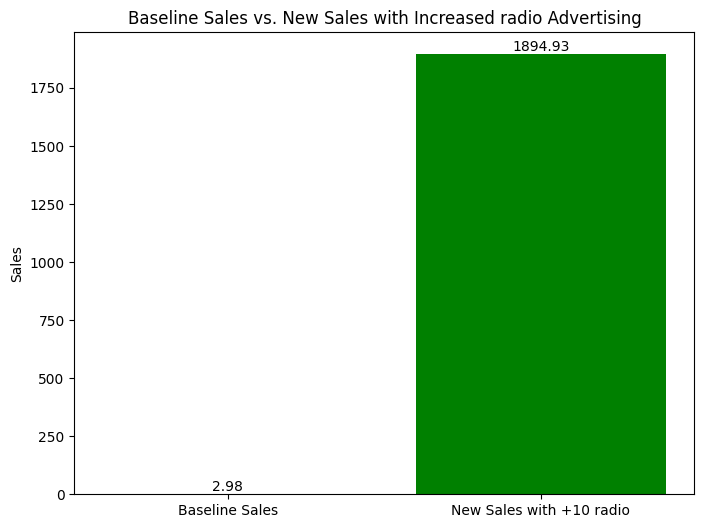

In [16]:
# Example usage
# Assuming the linear regression model (lr_model) and scaler have already been trained and defined
baseline_values = [0, 0, 0]  # Replace with actual baseline values if needed
increase_column = 'radio'
increase_amount = 10

lift_analysis(lr_model, scaler, baseline_values, increase_column, increase_amount)

Lift in Sales for a 10-unit increase in newspaper Advertising: 27.611143413671712


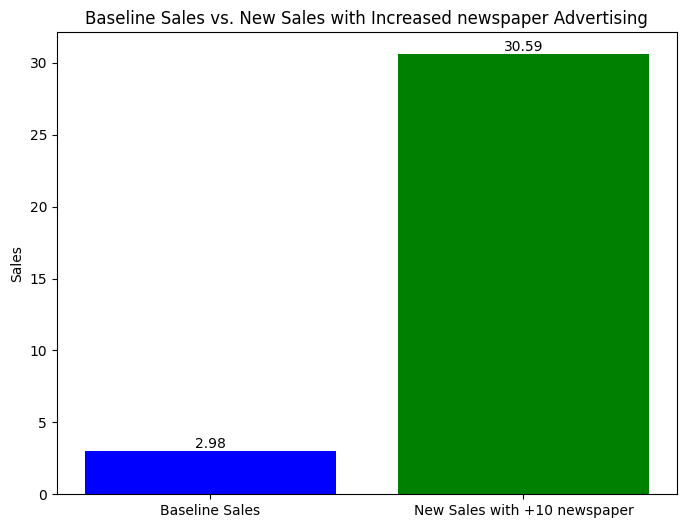

In [17]:
df# Example usage
# Assuming the linear regression model (lr_model) and scaler have already been trained and defined
baseline_values = [0, 0, 0]  # Replace with actual baseline values if needed
increase_column = 'newspaper'
increase_amount = 10

lift_analysis(lr_model, scaler, baseline_values, increase_column, increase_amount)

## Conclusion:

#### TV Advertising Impact: 
TV advertising has the highest elasticity and correlation with sales among all channels. A 1% increase in TV ad spend leads to a 4% increase in sales, making it the most effective medium for driving sales growth.

#### Model Efficacy: 
The linear regression model, validated through cross-validation, explains approximately 89.6% of the variance in sales (R-squared = 0.896). This high level of explanatory power indicates that the model is robust and reliable for predicting sales based on advertising spend.

#### Strategic Insights: 
While TV advertising shows significant impact, radio also demonstrates moderate effectiveness, with a 1% increase in spend resulting in a 0.45% sales increase. Conversely, newspaper advertising shows minimal impact, suggesting that reallocating funds from newspaper to TV and radio could optimize the overall advertising strategy for better returns.